In [1]:
%matplotlib inline
import nengo
import numpy as np
import pylab

In [40]:
model = nengo.Network()
with model:
    stim = nengo.Node([0.5])
    stim_attend = nengo.Node([0.5])
    
    n_neurons = 50
    dendrites = nengo.networks.EnsembleArray(n_neurons=100, ens_dimensions=2, n_ensembles=n_neurons)
    encoders = nengo.dists.UniformHypersphere(surface=True).sample(n_neurons, d=1)
    ens = nengo.Ensemble(n_neurons=n_neurons, dimensions=1, encoders=encoders)
    for i in range(n_neurons):
        dendrites.ensembles[i].neuron_type = nengo.Sigmoid()
        nengo.Connection(stim, dendrites.ensembles[i][0])
        nengo.Connection(stim_attend, dendrites.ensembles[i][1])
        def product(x):
            return x[0]*x[1]
        conn = nengo.Connection(dendrites.ensembles[i], ens.neurons[i], function=product, transform=encoders[i])
    p = nengo.Probe(ens, synapse=0.03)    

In [41]:
sim = nengo.Simulator(model)
sim.run(1)

Simulation finished in 0:00:06.                                                 


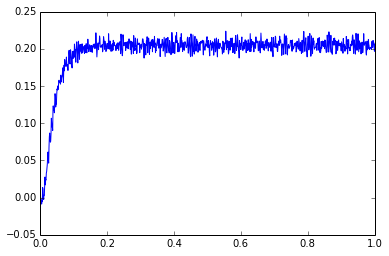

In [42]:
pylab.plot(sim.trange(), sim.data[p])